In [7]:
import pandas as pd
import json
import os
import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots
import plotly.io as pio
pio.kaleido.scope.mathjax = None

# Retrieval

In [8]:
org_df = pd.read_csv("../experiments/results/retrieval-model-results.csv")

print("size of org_df:", org_df.shape)

models = ['AdaRetrieval', 'TFIDFRetrieval', 'SpecterBERTRetrieval', 'BERTRetrieval']

df = org_df[org_df['model'].isin(models)]

print("size of filtered df:", df.shape)

print(df.groupby("model-config")["recall"].mean())

df.groupby(["model", "model-config"])["recall"].mean()

size of org_df: (1140, 14)
size of filtered df: (600, 14)
model-config
5     82.094389
10    84.666944
20    86.824120
Name: recall, dtype: float64


model                 model-config
AdaRetrieval          5               90.888888
                      10              92.564446
                      20              93.922838
BERTRetrieval         5               86.093784
                      10              88.579990
                      20              90.917147
SpecterBERTRetrieval  5               82.106273
                      10              84.996110
                      20              87.316651
TFIDFRetrieval        5               75.151610
                      10              77.792231
                      20              79.872322
Name: recall, dtype: float64

In [9]:
markers_dict = {
    "AdaRetrieval":"square",
    "BERTRetrieval": "circle",
    "TFIDFRetrieval": "star",
    "SpecterBERTRetrieval": "diamond",
}


colors_dict = {
    "label":"green",
    "label-children": "red",
    "label-parent": "blue",
}

model_name_mapper = {
    "AdaRetrieval":"Ada",
    "BERTRetrieval": "BERT",
    "TFIDFRetrieval": "TFIDF",
    "SpecterBERTRetrieval": "SPECTER2",
}

encoder_dict = {
    "label":"Concept",
    "label-children": "Concept-Children",
    "label-parent": "Concept-Parent",
}


width = 1300
height = 520

dataset_names = list(df['ontology-name'].unique())

dataset_names_mapper = {
  'mouse-human': 'Mouse-Human', # 0 
  
 'envo-sweet': 'ENVO-SWEET', # 1
 'fish-zooplankton': 'FISH-ZOOPLANKTON', # 2
 'macroalgae-macrozoobenthos': 'ALGAE-ZOOBENTHOS', # 3
 'taxrefldBacteria-ncbitaxonBacteria': 'Bacteria', # 4 TAXR-NCBI 
 'taxrefldChromista-ncbitaxonChromista': 'Chromista', # 5
 'taxrefldFungi-ncbitaxonFungi': 'Fungi', # 6
 'taxrefldPlantae-ncbitaxonPlantae': 'Plantae', # 7
 'taxrefldProtozoa-ncbitaxonProtozoa': 'Protozoa', # 8
 
 'hp-mp': 'HP-MP', # 9
 'doid-ordo': 'DOID-ORDO', # 10
  
 'nell-dbpedia': 'Nell-DBpedia', # 11
 'yago-wikidata': 'YAGO-Wikidata', # 12

 'snomed-ncit.neoplas': 'SNOMED-NCIT ', # 13 (neoplas)
 'snomed-ncit.pharm': 'SNOMED-NCIT', # 14  (pharm)
  'ncit-doid.disease': 'NCIT-DOID', # 15 (disease)
 'omim-ordo.disease': 'OMIM-ORDO', # 16 (disease)
 'snomed-fma.body': 'SNOMED-FMA', # 17 (body)
 
    
    'MaterialInformation-MatOnto': 'MI-MatOnto', # 18
    'MaterialInformation-EMMO': 'MI-EMMO', # 19
 
}

tracks = {"Anatomy":[0, 1], "Biodiv":[1, 9], "Phenotype":[9, 11], "CommonKG":[11, 13], "Bio-ML":[13, 18], "MSE":[18, 20]}

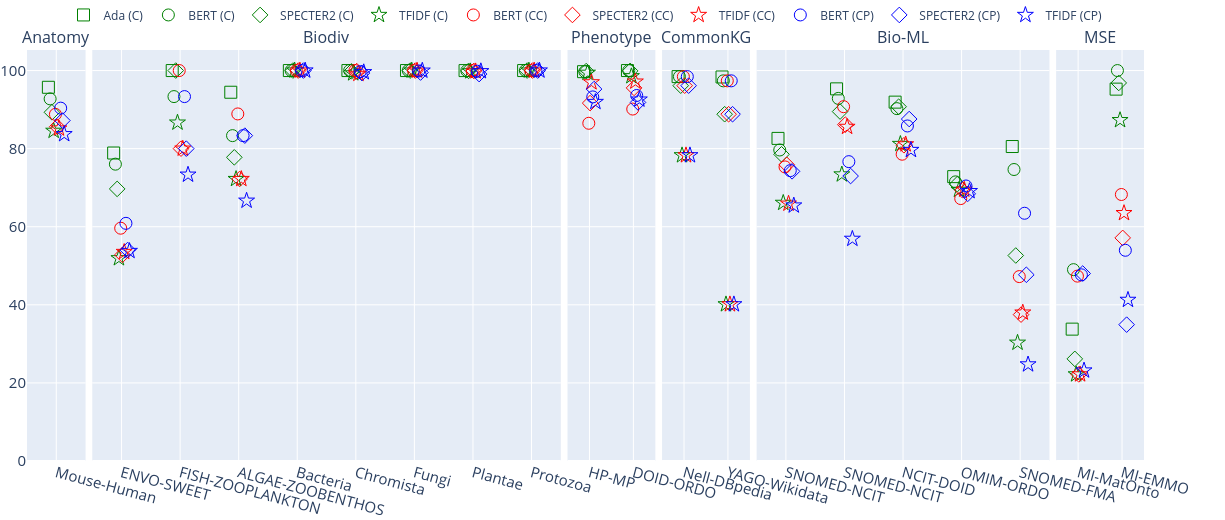

In [27]:
fig = make_subplots(rows=1, cols=6, shared_yaxes=True,  column_widths=[0.1, 0.8, 0.15, 0.15, 0.5, 0.15], 
                    horizontal_spacing = 0.006,  subplot_titles=("Anatomy", "Biodiv", "Phenotype", "CommonKG", "Bio-ML", "MSE"))

symol_size = 12
top_k = 5

encoder='label'
results_matrix = []
model_names = []

for model, group in df.groupby("model"):
    results = []
    model_names.append(model)
    for dataset in list(dataset_names_mapper.keys()):
        for dataset_name, data_results in group.groupby("ontology-name"):
            if dataset_name == dataset:
                data_results_df = data_results[data_results['encoder-representation']==encoder]
                data_results_df = data_results_df[data_results_df['model-config'] == top_k]
                results.append(data_results_df['recall'].iloc[0])
    results_matrix.append(results)
    
results_matrix = np.array(results_matrix)
for col, (track, indexes) in enumerate(tracks.items()):
    if col == 0:
        legend_visible = True
    else:
        legend_visible = False
    for i in range(0, 4):
        # print(results_matrix[i][indexes[0]:indexes[1]])
        fig.add_trace(go.Scatter(
            
            x=list(dataset_names_mapper.values())[indexes[0]:indexes[1]],
            y=results_matrix[i][indexes[0]:indexes[1]],
            name = model_name_mapper[model_names[i]]+" (C)",
            showlegend=legend_visible,
            # legendgroup= encoder,
            # legendgrouptitle_text="Concept",
            # visible = legend_visible,
            line_color=colors_dict[encoder],
            mode='markers',
            marker=dict(
                size=symol_size, symbol=markers_dict[model_names[i]] + "-open" #, opacity=dot_opacity
            )
            ), row=1, col=col+1)


encoder='label-children'
results_matrix = []
model_names = []

for model, group in df.groupby("model"):
    results = []
    model_names.append(model)
    for dataset in list(dataset_names_mapper.keys()):
        for dataset_name, data_results in group.groupby("ontology-name"):
            if dataset_name == dataset:
                data_results_df = data_results[data_results['encoder-representation']==encoder]
                data_results_df = data_results_df[data_results_df['model-config'] == top_k]
                try:
                    results.append(data_results_df['recall'].iloc[0])
                except:
                    results.append(0)
    results_matrix.append(results)
    
results_matrix = np.array(results_matrix)
for col, (track, indexes) in enumerate(tracks.items()):
    for i in range(0, 4):
        if col == 1:
            legend_visible = True
        else:
            legend_visible = False
        if model_names[i] != "AdaRetrieval":
            fig.add_trace(go.Scatter(
                x=list(dataset_names_mapper.values())[indexes[0]:indexes[1]],
                y=results_matrix[i][indexes[0]:indexes[1]],
                name = model_name_mapper[model_names[i]]+" (CC)",
                showlegend=legend_visible,
                # legendgroup= encoder,
                # legendgrouptitle_text="Concept-Children",
                line_color= colors_dict[encoder],
                mode='markers',
                marker=dict(
                    size=symol_size, symbol=markers_dict[model_names[i]] + "-open"#, opacity=dot_opacity
                )
            ), row=1, col=col+1)

    
encoder='label-parent'
results_matrix = []
model_names = []

for model, group in df.groupby("model"):
    results = []
    model_names.append(model)
    for dataset in list(dataset_names_mapper.keys()):
        for dataset_name, data_results in group.groupby("ontology-name"):
            if dataset_name == dataset:
                data_results_df = data_results[data_results['encoder-representation']==encoder]
                data_results_df = data_results_df[data_results_df['model-config'] == top_k]
                try:
                    results.append(data_results_df['recall'].iloc[0])
                except:
                    results.append(0)
    results_matrix.append(results)

results_matrix = np.array(results_matrix)
for col, (track, indexes) in enumerate(tracks.items()):
    if col == 1:
         legend_visible = True
    else:
        legend_visible = False
    for i in range(0, 4):
        if model_names[i] != "AdaRetrieval":

            fig.add_trace(go.Scatter(
                x=list(dataset_names_mapper.values())[indexes[0]:indexes[1]],
                y=results_matrix[i][indexes[0]:indexes[1]],
               name = model_name_mapper[model_names[i]]+" (CP)",
                # legendgroup= encoder,
                showlegend=legend_visible,
                # legendgrouptitle_text="Concept-Parents",
                line_color=colors_dict[encoder],
                mode='markers',
                marker=dict(
                    size=symol_size, symbol=markers_dict[model_names[i]] + "-open"#, opacity=dot_opacity
                ) 
            ),row=1, col=col+1)


fig.update_layout(title=None,
                  scattermode="group",
                  scattergap= 0.7,
                  width=width,
                  height=height,
                  legend=dict( 
                      orientation="h", 
                      # y=0.007,
                      y=1.05,
                      # x=1,
                      x = 0.5,
                      yanchor='bottom',
                      # xanchor="right",
                      font = dict(size = 12),
                      xanchor = "center"
                  ),
                  margin=dict(l=0, r=0, t=0, b=0),
                  # margin=dict(t=0, b=0, l=0, r=0),
                  font  = dict(size=15),
                  )

fig.update_xaxes(
        tickangle = 15,
)

fig.update_yaxes(tick0=20, dtick=20)
fig.show()

fig.write_image("../images/retriever-model-results.pdf",
                width=width,
                height=height)
fig.write_image("../images/retriever-model-results.jpeg",
                width=width,
                height=height, scale=5)
fig.write_image("../images/retriever-model-results.svg",width=width,
                height=height)